In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

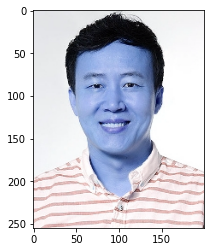

In [2]:
my_image_path = './images/image.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

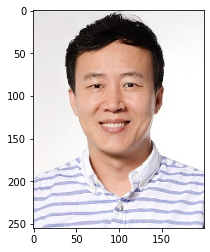

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

In [6]:
print(dlib_rects)

rectangles[[(44, 56) (151, 163)]]


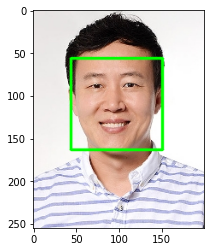

In [7]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
model_path = './models/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model_path)

In [9]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


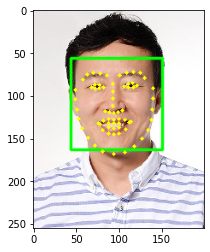

In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x, y) : (%d, %d)'%(x, y))
    print('(w, h) : (%d, %d)'%(w, h))

(93, 112)
(x, y) : (93, 58)
(w, h) : (108, 108)


In [12]:
sticker = cv2.imread('./images/king.png')
sticker = cv2.resize(sticker, (w, h))
print(sticker.shape)

(108, 108, 3)


In [13]:
refined_x = x - w // 2
refined_y = y - h

In [14]:
print(refined_x, refined_y)

39 -50


In [15]:
if refined_x < 0:
    sticker = sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    sticker = sticker[-refined_y:, :]
    refined_y = 0
    
print(refined_x, refined_y)

39 0


In [16]:
sticker_area = img_show[refined_y : refined_y + sticker.shape[0], refined_x : refined_x + sticker.shape[1]]
img_show[refined_y : refined_y + sticker.shape[0], refined_x : refined_x + sticker.shape[1]] = np.where(sticker == 0, sticker_area, sticker).astype(np.uint8)

sticker에서 값이 0인 부분은 원본 이미지 그대로 두고, 0이 아닌 부분은 스티커로 변경

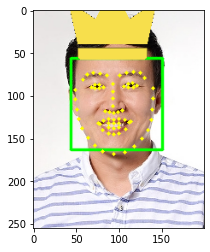

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

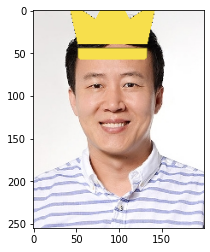

In [18]:
sticker_area = img_bgr[refined_y:refined_y +sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
img_bgr[refined_y:refined_y +sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = np.where(sticker==0,sticker_area,sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()